1. Recommend a Driver's Lifetime Value (i.e., the value of a driver to Lyft over the entire projected lifetime of a driver).


2. Please answer the following questions:

    a. What are the main factors that affect a driver's lifetime value?

    b. What is the average projected lifetime of a driver? That is, once a driver is onboarded, how long do they typically continue driving with Lyft?

    c. Do all drivers act alike? Are there specific segments of drivers that generate more value for Lyft than the average driver?

    d. What actionable recommendations are there for the business?


3. Prepare and submit a writeup of your findings for consumption by a cross-functional audience.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
#Read in tables
drivers = pd.read_csv('driver_ids.csv')
rides = pd.read_csv('ride_ids.csv')
rides_ts = pd.read_csv('ride_timestamps.csv')
#table created in lyft_competion_cleaning.ipynb
driver_full = pd.read_csv('driver_full.csv')

In [23]:
driver_full.head()
driver_full.describe()

,pickup_time,total_fares,num_rides,percent_prime,num_prime,lifetime,time_inactive,rides_per_day,group
count,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000,837.000000
mean,4.482286,2979.200134,220.081243,0.327358,77.778973,55.105137,12.927121,4.003395,0.761051
std,1.364548,2416.096207,178.179693,0.116589,70.770944,21.726518,19.550773,3.152681,0.722345
min,1.723611,24.598071,3.000000,0.000000,0.000000,1.000000,0.000000,0.046875,0.000000
25%,3.547643,618.243078,44.000000,0.250000,13.000000,42.000000,0.000000,1.409091,0.000000
50%,4.184710,2957.782342,224.000000,0.333333,72.000000,57.000000,2.000000,3.608696,1.000000
75%,5.093786,4476.205006,330.000000,0.402135,119.000000,73.000000,20.000000,5.481013,1.000000
max,11.033598,12348.830387,919.000000,0.753623,384.000000,90.000000,88.000000,35.000000,2.000000


In [ ]:
pickup time tanh and normalize and add or subtract 5%
number of rides per day tanh and normalize add or subtract 10%

# Driver's Lifetime Value

We believe that a driver's lifetime value should be defined by three factors: total fare revenue generated, number of prime time rides, and average pickup times. We chose this criteria because it is important that the drivers generate revenue as this is what any company relys on. We believe that number of prime time rides should be taken into consideration as it is important that these drivers work when they are most needed. We also chose to consider average pickup time as it is important the drivers are efficient with their time and provide quality customer service by not letting riders wait too long to be picked up.

# Main Factors Affecting Driver's Lifetime Value

ride frequency and 

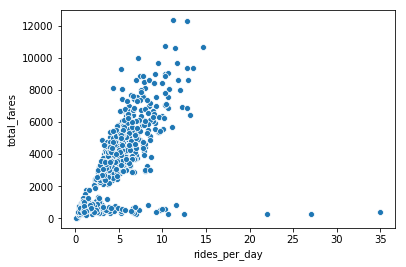

In [4]:
sns.scatterplot(x='rides_per_day', y='total_fares', data=driver_full)

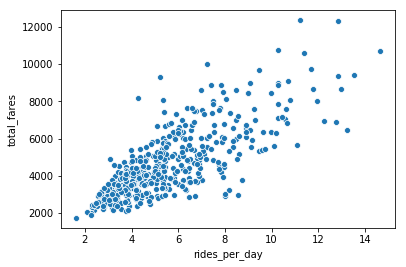

In [5]:
sns.scatterplot(x='rides_per_day', y='total_fares',
                data=driver_full[driver_full['num_rides']>=100])

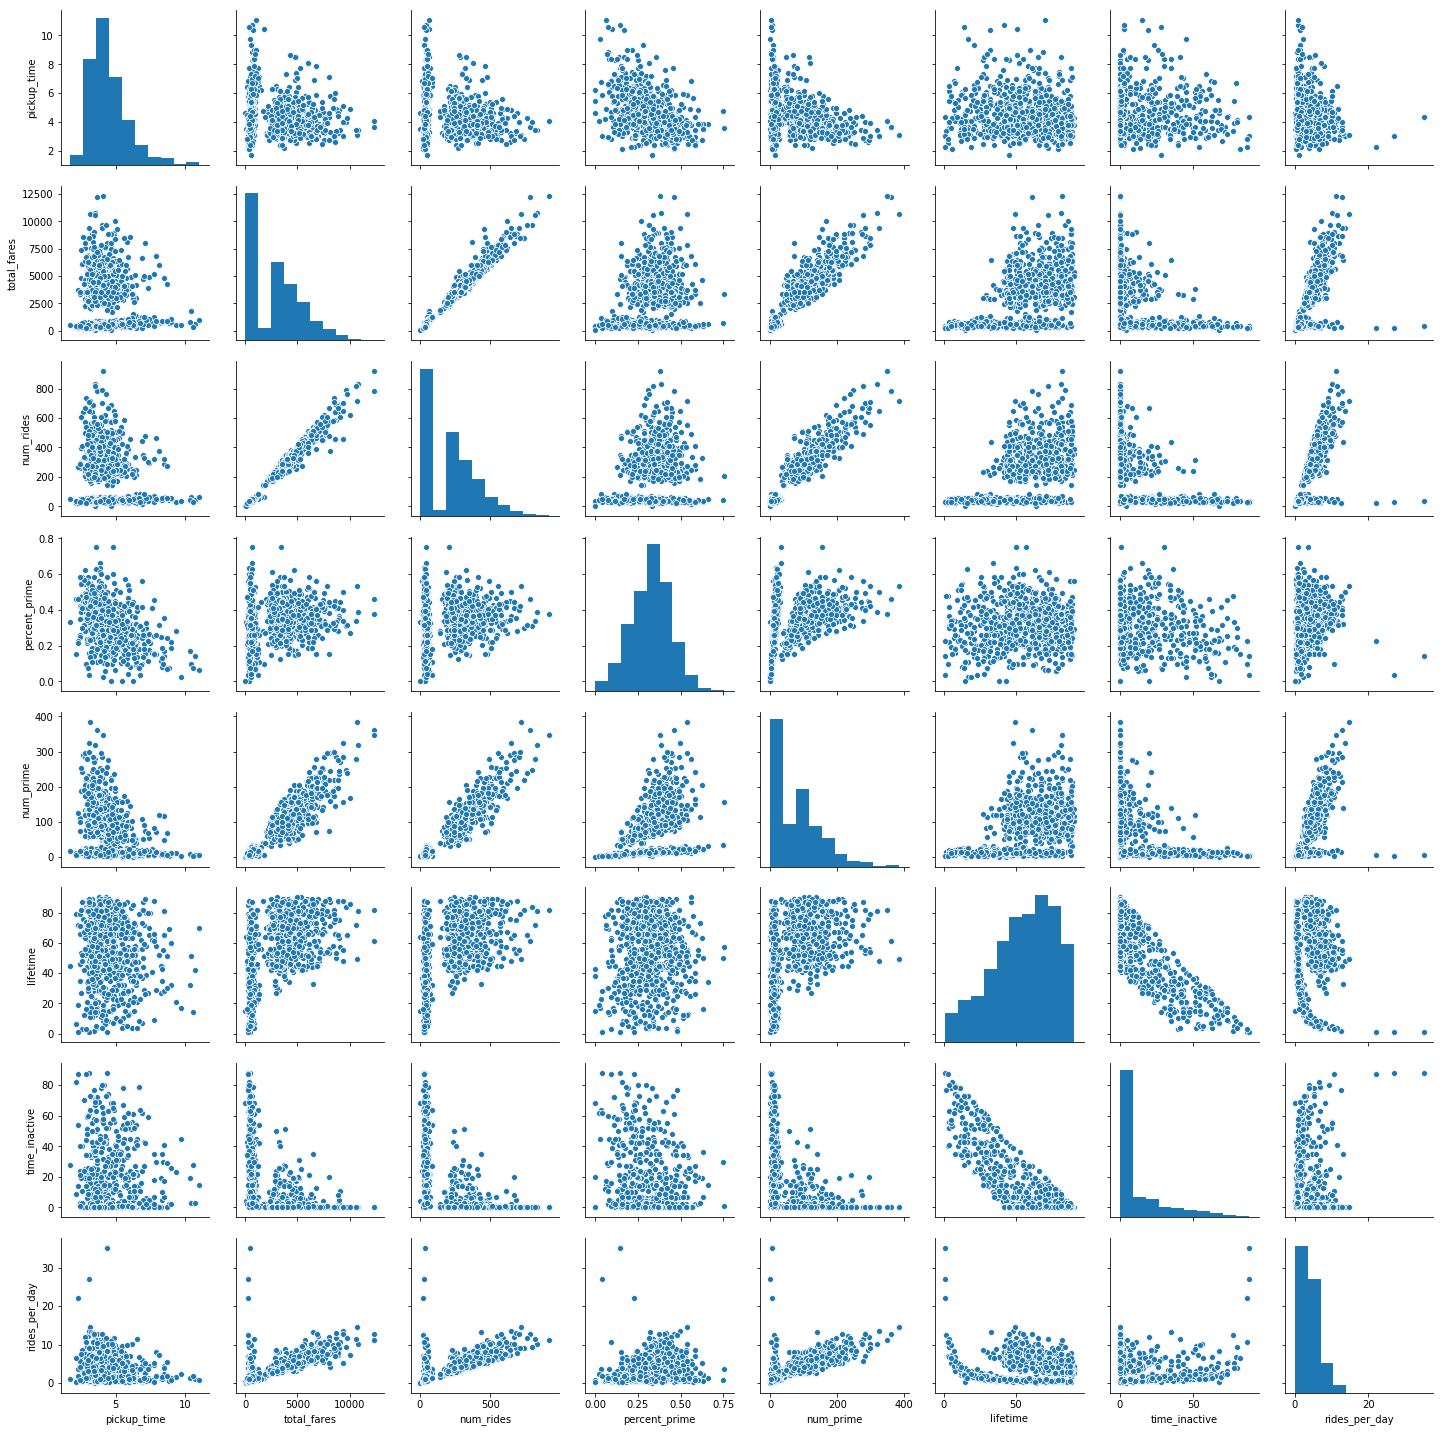

In [6]:
sns.pairplot(driver_full)

# Average Projected Lifetime of a Driver

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


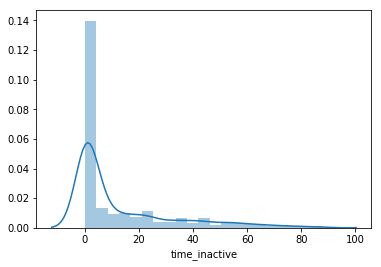

In [7]:
sns.distplot(driver_full['time_inactive'], )

In [8]:
# plt.hist(driver_full['time_inactive'], bins=50, alpha=.7, cumulative=1)

In [ ]:
rides

In [9]:
# <img src="files/image.png">

In [10]:
retention_rate = np.count_nonzero(
    [driver_full['time_inactive']<=7])/len(driver_full)
loss_rate = 1 - retention_rate
1/(loss_rate)*3

8.205882352941178

# Do All Drivers Act Alike?

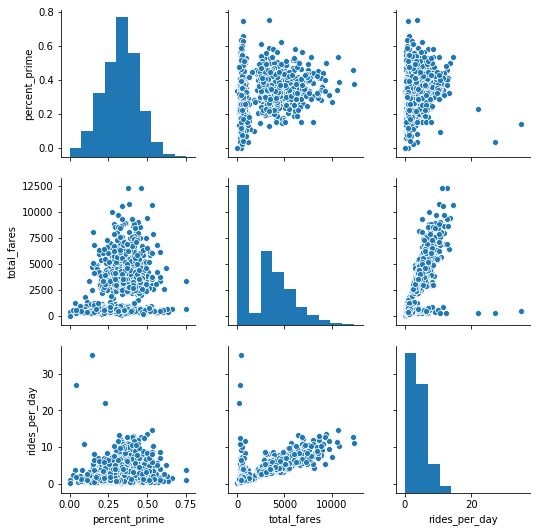

In [11]:
select_table=driver_full.copy()[['percent_prime', 'total_fares', 'rides_per_day']]
sns.pairplot(select_table)

In [19]:
X = driver_full.drop(columns=['driver_id']).values
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


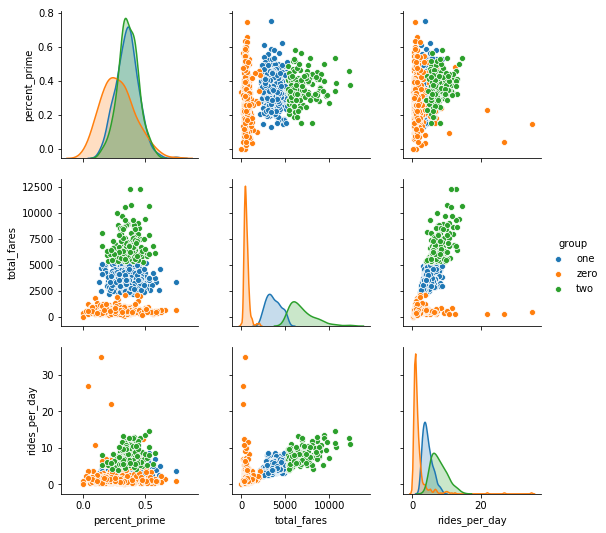

In [20]:
select_table['group'] = labels
groups = {0:'zero', 1:'one', 2:'two'}
select_copy = select_table.copy()
select_copy['group'] = select_copy['group'].apply(
    lambda x:groups[x])
sns.pairplot(select_copy, hue='group')

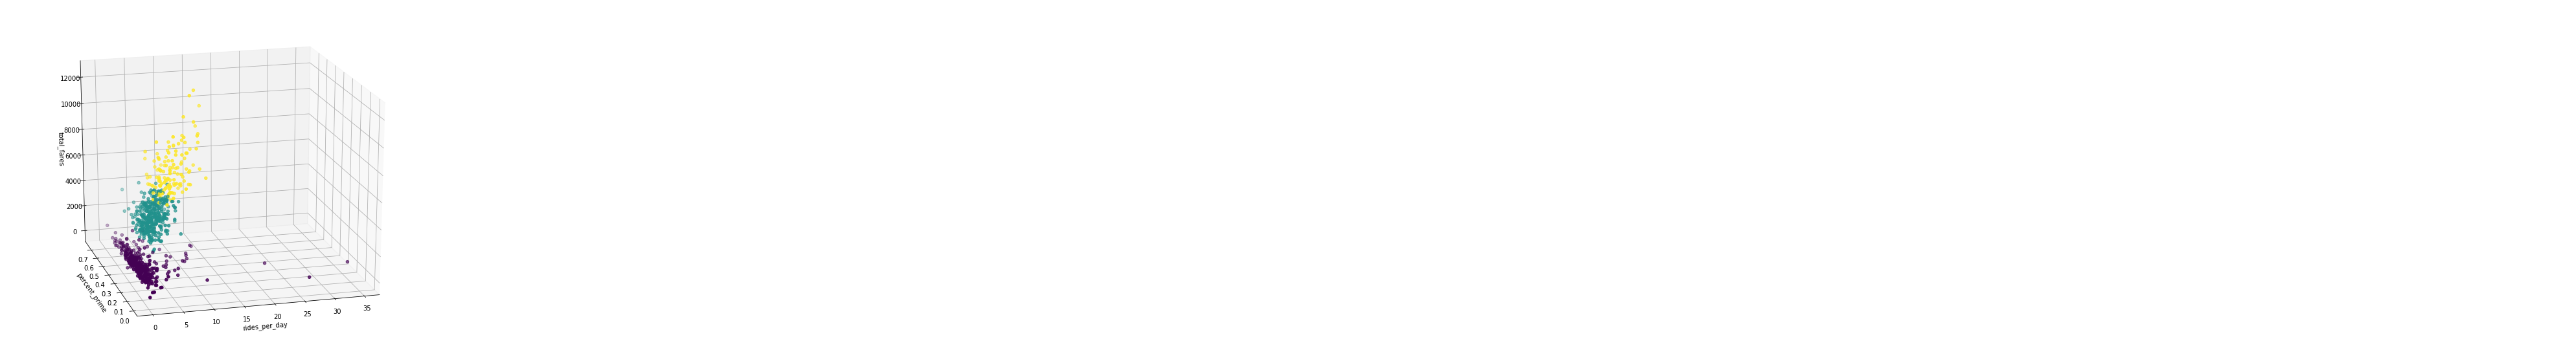

In [21]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(select_table['rides_per_day'], select_table['percent_prime'],
           select_table['total_fares'], c=select_table['group'])
ax.set_xlabel('rides_per_day')
ax.set_ylabel('percent_prime')
ax.set_zlabel('total_fares')
ax.view_init(20, 255)
plt.show()

In [15]:
driver_full['group'] = labels
driver_grouped = driver_full.groupby('group')[['total_fares', 'num_rides']].apply(np.sum)
driver_grouped

,total_fares,num_rides
group,,
0,2.073275e+05,14834.0
1,1.301063e+06,97311.0
2,9.851998e+05,72063.0


In [16]:
driver_group = driver_full.groupby('group')['num_rides'].apply(np.count_nonzero)
driver_group

group
0    342
1    353
2    142
Name: num_rides, dtype: int64

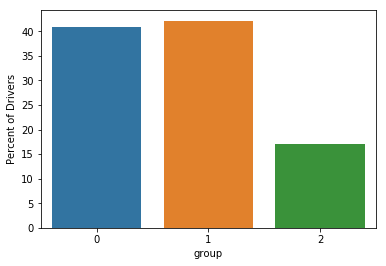

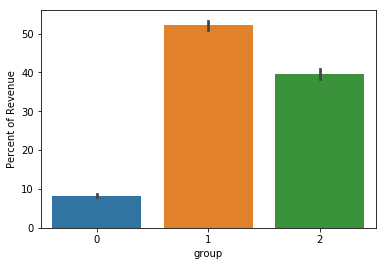

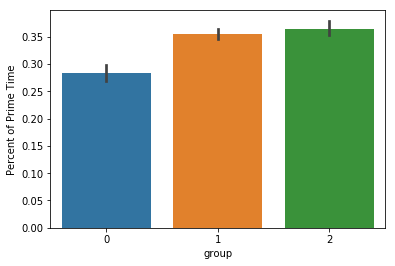

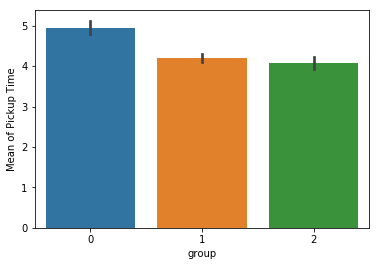

In [17]:
ax = sns.barplot(x="group", y="total_fares", data=driver_full,
                 estimator=lambda x: len(x)/len(driver_full)*100)
ax.set(ylabel="Percent of Drivers")
plt.show()
ax = sns.barplot(x='group', y='total_fares', data=driver_full,
            estimator=lambda x: np.sum(x)/np.sum(driver_full['total_fares'])*100)
ax.set(ylabel="Percent of Revenue")
plt.show()
ax = sns.barplot(x='group', y='percent_prime', data=driver_full,
            estimator=np.mean)
ax.set(ylabel="Percent of Prime Time")
plt.show()
ax = sns.barplot(x='group', y='pickup_time', data=driver_full,
            estimator=np.mean)
ax.set(ylabel="Mean of Pickup Time")
plt.show()

# Business Recommendations